In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

597

In [6]:
# Import the datetime module from the datetime library
from datetime import datetime

In [7]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | niort
Processing Record 4 of Set 1 | luderitz
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | sal rei
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | santa rosa
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | ponta delgada
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | maceio
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | panguna
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | havre-saint-pierre
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | da nang
Processing Record 20 of Set 1 | erenhot
Processing Record 21 of Set 1 | san policarpo
Processing Record 22 of Set 1 | mar

Processing Record 41 of Set 4 | koltsovo
Processing Record 42 of Set 4 | galgani
City not found. Skipping...
Processing Record 43 of Set 4 | eirunepe
Processing Record 44 of Set 4 | alta floresta
Processing Record 45 of Set 4 | mtsamboro
Processing Record 46 of Set 4 | aklavik
Processing Record 47 of Set 4 | tazovskiy
Processing Record 48 of Set 4 | vari
Processing Record 49 of Set 4 | bani
Processing Record 50 of Set 4 | okha
Processing Record 1 of Set 5 | katsuura
Processing Record 2 of Set 5 | jinan
Processing Record 3 of Set 5 | nome
Processing Record 4 of Set 5 | aporawan
City not found. Skipping...
Processing Record 5 of Set 5 | ewa beach
Processing Record 6 of Set 5 | clyde river
Processing Record 7 of Set 5 | kavaratti
Processing Record 8 of Set 5 | pemangkat
Processing Record 9 of Set 5 | moree
Processing Record 10 of Set 5 | cidreira
Processing Record 11 of Set 5 | husavik
Processing Record 12 of Set 5 | carnarvon
Processing Record 13 of Set 5 | anadyr
Processing Record 14 of

Processing Record 28 of Set 8 | sawtell
Processing Record 29 of Set 8 | henties bay
Processing Record 30 of Set 8 | sabha
Processing Record 31 of Set 8 | maragogi
Processing Record 32 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 33 of Set 8 | eucaliptus
Processing Record 34 of Set 8 | talnakh
Processing Record 35 of Set 8 | satka
Processing Record 36 of Set 8 | shieli
Processing Record 37 of Set 8 | astoria
Processing Record 38 of Set 8 | ahipara
Processing Record 39 of Set 8 | kailua
Processing Record 40 of Set 8 | burnie
Processing Record 41 of Set 8 | beringovskiy
Processing Record 42 of Set 8 | sarab
Processing Record 43 of Set 8 | mo i rana
Processing Record 44 of Set 8 | vardo
Processing Record 45 of Set 8 | mana
Processing Record 46 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 47 of Set 8 | patterson
Processing Record 48 of Set 8 | drummondville
Processing Record 49 of Set 8 | mattru
Processing Record 50 of Set 8 | attawapisk

Processing Record 17 of Set 12 | sangmelima
Processing Record 18 of Set 12 | moissala
Processing Record 19 of Set 12 | adelanto
Processing Record 20 of Set 12 | peniche
Processing Record 21 of Set 12 | rawson
Processing Record 22 of Set 12 | salinas
Processing Record 23 of Set 12 | chipata
Processing Record 24 of Set 12 | kununurra
Processing Record 25 of Set 12 | tautira
Processing Record 26 of Set 12 | urucara
Processing Record 27 of Set 12 | roald
Processing Record 28 of Set 12 | victor harbor
Processing Record 29 of Set 12 | achinsk
Processing Record 30 of Set 12 | minab
Processing Record 31 of Set 12 | kimberley
Processing Record 32 of Set 12 | piranshahr
Processing Record 33 of Set 12 | yingzhong
City not found. Skipping...
Processing Record 34 of Set 12 | at-bashi
Processing Record 35 of Set 12 | imbituba
Processing Record 36 of Set 12 | anloga
Processing Record 37 of Set 12 | aktash
Processing Record 38 of Set 12 | dakar
Processing Record 39 of Set 12 | chumphon
Processing Reco

In [10]:
len(city_data)

548

In [11]:
# Convert array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,7.07,78,10,7.83,GL,2021-01-19 02:13:58
1,Niort,46.3333,-0.3333,34.00,88,96,8.50,FR,2021-01-19 02:09:18
2,Luderitz,-26.6481,15.1594,64.92,84,49,11.97,NA,2021-01-19 02:13:58
3,Rikitea,-23.1203,-134.9692,78.48,74,72,14.41,PF,2021-01-19 02:13:58
4,Saint-Philippe,-21.3585,55.7679,78.80,69,0,4.61,RE,2021-01-19 02:13:58
5,Sal Rei,16.1833,-22.9167,69.80,68,100,18.41,CV,2021-01-19 02:13:58
6,Provideniya,64.3833,-173.3000,-4.00,71,75,13.42,RU,2021-01-19 02:13:58
7,Santa Rosa,14.3122,121.1114,82.00,74,75,2.30,PH,2021-01-19 02:13:59
8,Faanui,-16.4833,-151.7500,80.85,77,4,15.46,PF,2021-01-19 02:13:59
9,Ponta Delgada,37.7333,-25.6667,61.00,82,75,18.41,PT,2021-01-19 02:09:02


In [12]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2021-01-19 02:13:58,72.7868,-56.1549,7.07,78,10,7.83
1,Niort,FR,2021-01-19 02:09:18,46.3333,-0.3333,34.00,88,96,8.50
2,Luderitz,NA,2021-01-19 02:13:58,-26.6481,15.1594,64.92,84,49,11.97
3,Rikitea,PF,2021-01-19 02:13:58,-23.1203,-134.9692,78.48,74,72,14.41
4,Saint-Philippe,RE,2021-01-19 02:13:58,-21.3585,55.7679,78.80,69,0,4.61
5,Sal Rei,CV,2021-01-19 02:13:58,16.1833,-22.9167,69.80,68,100,18.41
6,Provideniya,RU,2021-01-19 02:13:58,64.3833,-173.3000,-4.00,71,75,13.42
7,Santa Rosa,PH,2021-01-19 02:13:59,14.3122,121.1114,82.00,74,75,2.30
8,Faanui,PF,2021-01-19 02:13:59,-16.4833,-151.7500,80.85,77,4,15.46
9,Ponta Delgada,PT,2021-01-19 02:09:02,37.7333,-25.6667,61.00,82,75,18.41


In [13]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting
lat = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

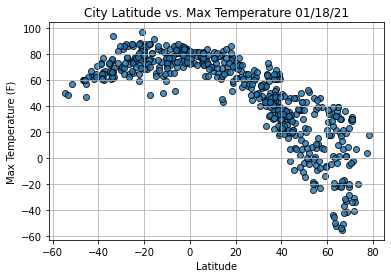

In [15]:
# Import time module 
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lat,
           max_temps,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

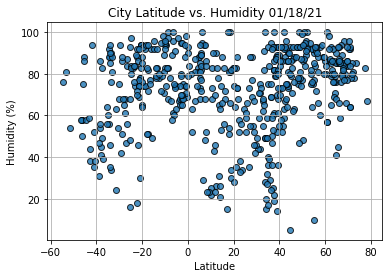

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lat,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

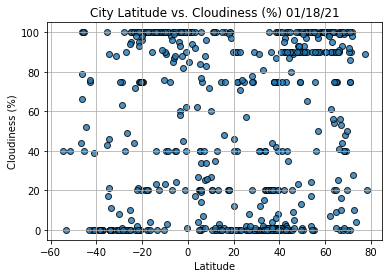

In [17]:
# Build the scatter plots for latitude vs. Cloudiness
plt.scatter(lat,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

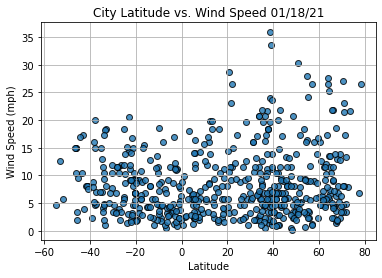

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lat,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [19]:
# Import linear regression from the SciPy stats module
from scipy.stats import linregress

In [20]:
# Create an equal number of latitudes and temperatures
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [21]:
# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

# Get the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [22]:
# Calculate the regression line "y values" from the slope and intercept
regress_values = [(lat * slope + intercept) for lat in lats]

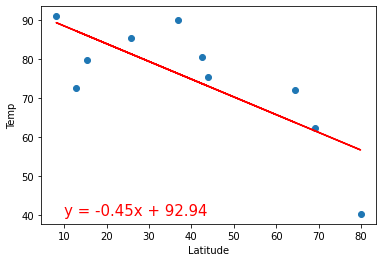

In [23]:
# Create a scatter plot of the x and y values
plt.scatter(lats,temps)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope
plt.plot(lats,regress_values, "r")

# Annotate the text for the line equation and add its coordinates
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [24]:
# Create a function to perfrom linear regression on weather weater and plot regression line and equation with the data
def plot_linear_regression(x_vales, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
     # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

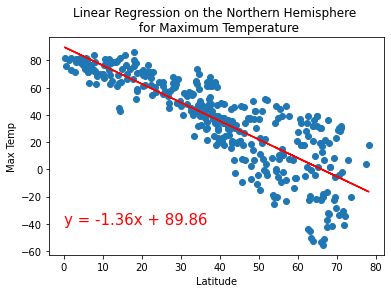

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 
                       'Max Temp', (0,-40))


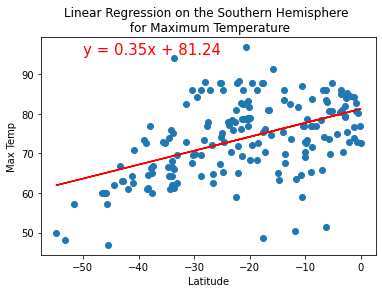

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,95))

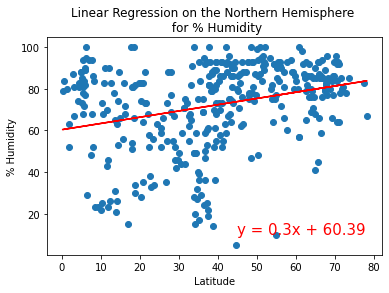

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,10))

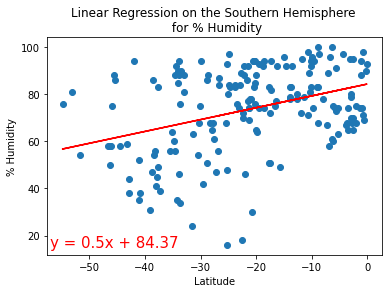

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-57,15))

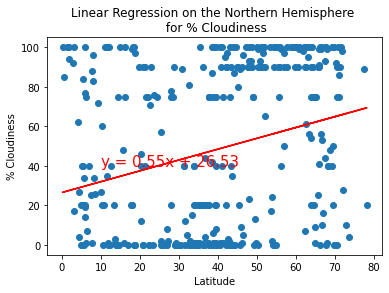

In [30]:
# Linear regression on the Northern Hemisphere cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,40))

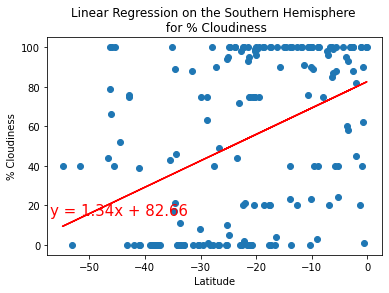

In [31]:
# Linear regression on the Southern Hemisphere cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-57,15))

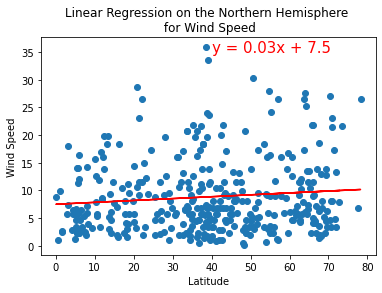

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

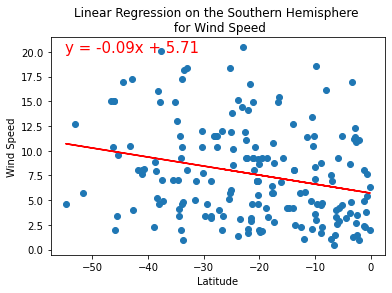

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,20))